In [1]:
import sys
sys.path.append('../../libs/')
import SIRmodels as mdl
import numpy as np
import matplotlib.pyplot as plt

# For latex use
from matplotlib import rc
rc('font',**{'family':'serif'})
rc('text', usetex=True)

In [31]:
# Originals values
N = 1000000
SIIR0 = np.zeros(9)
SIIR0[1] = 10
SIIR0[2] = 10
SIIR0[0] = N - np.sum(SIIR0[1:8])

t_start = 0
t_end = 23
n_int = 10000

t_sim = np.linspace(t_start, t_end, n_int)

In [32]:
# Independent case
b1=10
b2=6
paramsInd = [b1,b2,b1/1.15,b2/1.12,b1,b2,b1/1.15,b2/1.12] 

siirSimInd = mdl.SIIR(SIIR0, paramsInd, t_sim)
siirSimInd.runEvaluation(norm=True)
resInd = siirSimInd.getResult()

inf1Ind = resInd[:, 1] + resInd[:, 3] + resInd[:, 7]
rec1Ind = resInd[:, 4] + resInd[:, 6] + resInd[:, 8]
inf2Ind = resInd[:, 2] + resInd[:, 3] + resInd[:, 6]
rec2Ind = resInd[:, 5] + resInd[:, 7] + resInd[:, 8]

In [33]:
# Interactive case
paramsInt = [b1,b2,b1/1.15,b2/1.12,b1,0,b1/1.15,1000]

siirSimInt = mdl.SIIR(SIIR0, paramsInt, t_sim)
siirSimInt.runEvaluation(norm=True)
resInt = siirSimInt.getResult()

inf1Int = resInt[:, 1] + resInt[:, 3] + resInt[:, 7]
rec1Int = resInt[:, 4] + resInt[:, 6] + resInt[:, 8]
inf2Int = resInt[:, 2] + resInt[:, 3] + resInt[:, 6]
rec2Int= resInt[:, 5] + resInt[:, 7] + resInt[:, 8]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


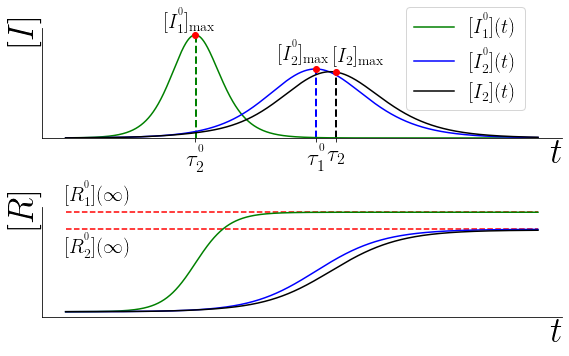

In [51]:
fig, ax = plt.subplots(2,1)
peak = []
timePeak = []

peak.append(siirSimInd.getDisease1()[0][siirSimInd.getDisease1()[1]])
peak.append(siirSimInd.getDisease2()[0][siirSimInd.getDisease2()[1]])
peak.append(siirSimInt.getDisease2()[0][siirSimInt.getDisease2()[1]])

timePeak.append(0 if siirSimInd.getDisease1()[1].size==0 else t_sim[siirSimInd.getDisease1()[1]][0])
timePeak.append(0 if siirSimInd.getDisease2()[1].size==0 else t_sim[siirSimInd.getDisease2()[1]][0])
timePeak.append(0 if siirSimInt.getDisease2()[1].size==0 else t_sim[siirSimInt.getDisease2()[1]][0]+0.25)


ax[0].plot(t_sim, siirSimInd.getDisease1()[0],'g',label=r"$[I_1^\mathrm{^0}] (t)$")
ax[0].vlines(timePeak[0]+0.02,0, peak[0], lw=2, color='g',linestyles='dashed')
ax[0].scatter([timePeak[0]],[peak[0]], marker='o', color='red',zorder=3)

ax[0].plot(t_sim, siirSimInd.getDisease2()[0],'b',label=r"$[I_2^\mathrm{^0}] (t)$")
ax[0].vlines(timePeak[1]+0.02,0, peak[1], lw=2, color='b',linestyles='dashed')
ax[0].scatter([timePeak[1]],[peak[1]], marker='o', color='red',zorder=3)

ax[0].plot(t_sim, siirSimInt.getDisease2()[0],'k',label=r"$[I_2] (t)$")
ax[0].vlines(timePeak[2]+0.02,0, peak[2], lw=2, color='k',linestyles='dashed')
ax[0].scatter([timePeak[2]],[peak[2]], marker='o', color='red',zorder=3)


ax[0].set_xticks(timePeak)
ax[0].text(timePeak[0]-1.5, peak[0]+0.0005, r"$[I_1^\mathrm{^0}]_\mathrm{max}$", fontsize=20)
ax[0].text(timePeak[1]-1.8, peak[1]+0.0008, r"$[I_2^\mathrm{^0}]_\mathrm{max}$", fontsize=20)
ax[0].text(timePeak[2]-0.1, peak[2]+0.0008, r"$[I_2]_\mathrm{max}$", fontsize=20)
ax[0].set_xticklabels([r'$\tau_{2}^\mathrm{^0}$',r'$\tau_{1}^\mathrm{^0}$',r'$\tau_2$'], fontsize=23)
ax[0].set_yticks([])
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].xaxis.set_label_coords(0.99,-0.01)
ax[0].yaxis.set_label_coords(0,0.99)
ax[0].set_ylabel(r"$[I]$",fontsize=35)
ax[0].set_xlabel(r"$t$",fontsize=35)
ax[0].set_ylim(0,0.0095)
ax[0].legend(loc=(0.7,0.25),fontsize=20)

ax[1].plot(t_sim,rec1Ind,'g')
ax[1].plot(t_sim,rec2Ind,'b')
ax[1].plot(t_sim,rec2Int,'k')
ax[1].hlines(rec2Ind[-1]+0.001,0,23,color='r',
             linestyles='dashed')
ax[1].hlines(rec1Ind[-1]+0.001,0,23,color='r',
             linestyles='dashed')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].text(0, rec1Ind[-2]+0.025, r"$[R_1^\mathrm{^0}] (\infty) $", fontsize=20)
ax[1].text(0, rec2Ind[-1]-0.06, r"$[R_2^\mathrm{^0}] (\infty)$", fontsize=20)
ax[1].xaxis.set_label_coords(0.99,-0.01)
ax[1].yaxis.set_label_coords(0,0.99)
ax[1].set_ylabel(r"$[R]$",fontsize=35)
ax[1].set_xlabel(r"$t$",fontsize=35)



fig.set_size_inches(8,5)
fig.tight_layout()
fig.savefig('images/3-1_paramExplanation.eps')
plt.show()